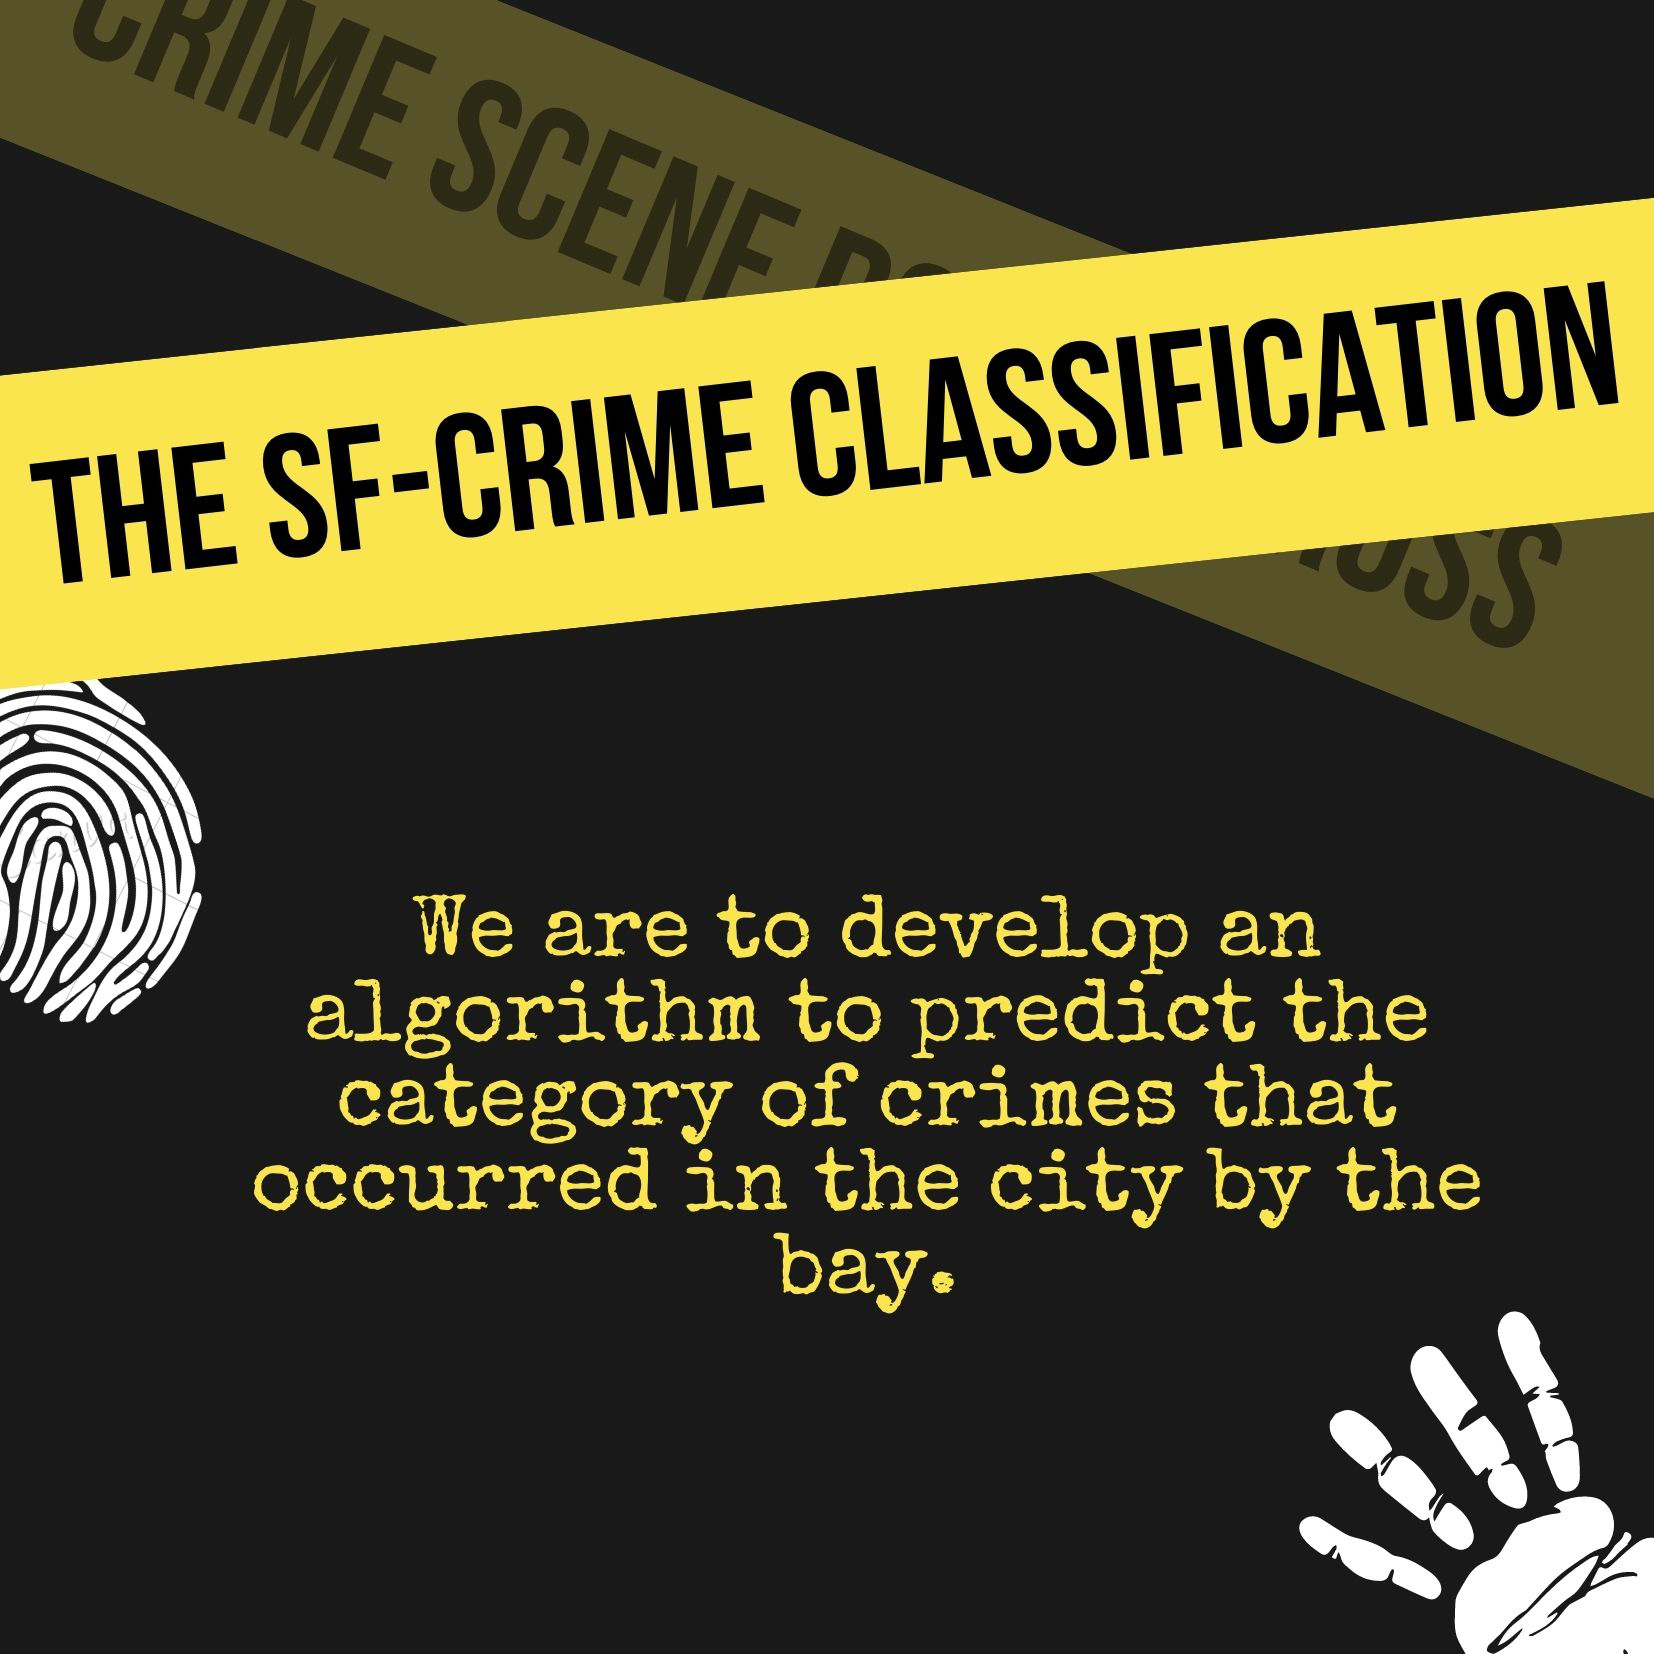

In [6]:
im1 = Image.open(r"C:\Users\seyi\Desktop\MY DATA SCIENCE WORKS, TUTORIAL AND JOURNEY\MY DATASETS USED\sf-crime\sf-crime\Yellow Murder Mystery Invitation.jpg")
im1

## Step 1: Define the Problem
For this project, we are to develop an algorithm to predict the category of crimes that occured in in the city by the bay.

Project Summary: From 1934 to 1963, San Francisco was infamous for housing some of the world's most notorious criminals on the inescapable island of Alcatraz.

Today, the city is known more for its tech scene than its criminal past. But, with rising wealth inequality, housing shortages, and a proliferation of expensive digital toys riding BART to work, there is no scarcity of crime in the city by the bay.

From Sunset to SOMA, and Marina to Excelsior, this competition's dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred.

We're also encouraging you to explore the dataset visually. What can we learn about the city through visualizations like this Top Crimes Map? The top most up-voted scripts from this competition will receive official Kaggle swag as prizes. 


## Step 2: Gather the Data
The dataset is also given to us with the train and test data at [Kaggle Playground Prediction Competition: SF Crime Classification](https://www.kaggle.com/c/sf-crime/overview)


## Step 3: Prepare Data for Consumption

### Import Libraries
The following code is written in Python 3.x.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from datetime import datetime

%matplotlib inline
plt.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

from sklearn.preprocessing import LabelEncoder

import xgboost as xgb

import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from os import path
from PIL import Image

import warnings 
warnings.filterwarnings('ignore')

### The Dataset
Data Description
This dataset contains incidents derived from SFPD Crime Incident Reporting system. The data ranges from 1/1/2003 to 5/13/2015. The training set and test set rotate every week, meaning week 1,3,5,7... belong to test set, week 2,4,6,8 belong to training set. 

Data fields
1. Dates - timestamp of the crime incident
2. Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.
3. Descript - detailed description of the crime incident (only in train.csv)
4. DayOfWeek - the day of the week
5. PdDistrict - name of the Police Department District
6. Resolution - how the crime incident was resolved (only in train.csv)
7. Address - the approximate street address of the crime incident 
8. X - Longitude, Y - Latitude

In [2]:
# Load the dataset
data_train = pd.read_csv(r"C:\Users\seyi\Desktop\MY DATA SCIENCE WORKS, TUTORIAL AND JOURNEY\MY DATASETS USED\sf-crime\sf-crime\train.csv")
data_test = pd.read_csv(r"C:\Users\seyi\Desktop\MY DATA SCIENCE WORKS, TUTORIAL AND JOURNEY\MY DATASETS USED\sf-crime\sf-crime\test.csv")

data1 = data_train.copy(deep = True)
data_cleaner = [data1, data_test]
sample_submission = pd.read_csv(r"C:\Users\seyi\Desktop\MY DATA SCIENCE WORKS, TUTORIAL AND JOURNEY\MY DATASETS USED\sf-crime\sf-crime\sampleSubmission.csv")

In [3]:
# Read the dataset
data_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [7]:
data_test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


## Clean Data

In [4]:
# Checking for null/na values
data_train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [5]:
data_train.isna().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [8]:
print('Duplicated entries:',data_train.duplicated().sum())
data_train[data_train.duplicated()].isna().mean()

Duplicated entries: 2323


Dates         0.0
Category      0.0
Descript      0.0
DayOfWeek     0.0
PdDistrict    0.0
Resolution    0.0
Address       0.0
X             0.0
Y             0.0
dtype: float64

In [9]:
# Dropping the Resolution column
data_train.drop('Resolution', axis = 1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607


## Feature Engineering and Preprocessing


In [10]:
data_train.Dates.dtype    #Checking if the Dates is parsed to Datetime

dtype('O')

In [11]:
# Check if there are errors in the Dates column
assert data_train.Dates.isnull().any() == False
assert data_test.Dates.isnull().any() == False

In [13]:
assert data_train.Dates.str.match('\d\d\d\d-\d\d-\d\d \d\d:\d\d:\d\d').all() == True
assert data_test.Dates.str.match('\d\d\d\d-\d\d-\d\d \d\d:\d\d:\d\d').all() == True

In [14]:
# Parse the Dates using the pandas.to_datetime:
data_train['Date'] = pd.to_datetime(data_train.Dates)
data_test['Date'] = pd.to_datetime(data_test.Dates)

data_train = data_train.drop('Dates', axis=1)
data_test = data_test.drop('Dates', axis=1)

In [15]:
data_train.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13 23:33:00
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13 23:30:00
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13 23:30:00


In [17]:
data_train.Date.dtype    #Checking if the Dates is parsed to Datetime

dtype('<M8[ns]')

In [18]:
data_train['IsDay'] = 0
data_train.loc[ (data_train.Date.dt.hour > 6) & (data_train.Date.dt.hour < 20), 'IsDay' ] = 1

data_test['IsDay'] = 0
data_test.loc[ (data_test.Date.dt.hour > 6) & (data_test.Date.dt.hour < 20), 'IsDay' ] = 1

data_train.head(3)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,IsDay
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,0
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,0
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13 23:33:00,0


In [19]:
days_to_int_dic = {
        'Monday': 1,
        'Tuesday': 2,
        'Wednesday': 3,
        'Thursday': 4,
        'Friday': 5,
        'Saturday': 6,
        'Sunday': 7,
}
data_train['DayOfWeek'] = data_train['DayOfWeek'].map(days_to_int_dic)
data_test ['DayOfWeek'] = data_test ['DayOfWeek'].map(days_to_int_dic)


data_train.DayOfWeek.unique()

array([3, 2, 1, 7, 6, 5, 4], dtype=int64)

In [21]:
data_train['Hour'] = data_train.Date.dt.hour
data_train['Month'] = data_train.Date.dt.month
data_train['Year'] = data_train.Date.dt.year
data_train['Year'] = data_train['Year'] - 2000 

data_test['Hour'] = data_test.Date.dt.hour
data_test['Month'] = data_test.Date.dt.month
data_test['Year'] = data_test.Date.dt.year
data_test['Year'] = data_test['Year'] - 2000 
data_train.sample(1)

data_train['HourCos'] = np.cos((data_train['Hour']*2*np.pi)/24 )
data_train['DayOfWeekCos'] = np.cos((data_train['DayOfWeek']*2*np.pi)/7 )
data_train['MonthCos'] = np.cos((data_train['Month']*2*np.pi)/12 )

data_test['HourCos'] = np.cos((data_test['Hour']*2*np.pi)/24 )
data_test['DayOfWeekCos'] = np.cos((data_test['DayOfWeek']*2*np.pi)/7 )
data_test['MonthCos'] = np.cos((data_test['Month']*2*np.pi)/12 )


data_train.sample(1)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,IsDay,Hour,Month,Year,HourCos,DayOfWeekCos,MonthCos
250773,BURGLARY,"BURGLARY OF RESIDENCE, UNLAWFUL ENTRY",4,TARAVAL,NONE,2000 Block of 36TH AV,-122.494292,37.748759,2011-12-29 07:30:00,1,7,12,11,-0.258819,-0.900969,1.0


In [22]:
# Creating a Dummy Encoding of PdDistrict
data_train = pd.get_dummies(data_train, columns=['PdDistrict'])
data_test = pd.get_dummies(data_test, columns=['PdDistrict'])

data_train.head(3)

,Category,Descript,DayOfWeek,Resolution,Address,X,Y,Date,IsDay,Hour,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,WARRANTS,WARRANT ARREST,3,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,0,23,...,0,0,0,0,1,0,0,0,0,0
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,0,23,...,0,0,0,0,1,0,0,0,0,0
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13 23:33:00,0,23,...,0,0,0,0,1,0,0,0,0,0


In [23]:
# Label encoding of the Category
Cat_Le = LabelEncoder()
data_train['CategoryInt'] = pd.Series(Cat_Le.fit_transform(data_train.Category))

data_train.head(3)

,Category,Descript,DayOfWeek,Resolution,Address,X,Y,Date,IsDay,Hour,...,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,CategoryInt
0,WARRANTS,WARRANT ARREST,3,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,0,23,...,0,0,0,1,0,0,0,0,0,37
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,0,23,...,0,0,0,1,0,0,0,0,0,21
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13 23:33:00,0,23,...,0,0,0,1,0,0,0,0,0,21


In [25]:
data_train['InIntersection'] = 1
data_train.loc[data_train.Address.str.contains('Block'), 'InIntersection'] = 0

data_test['InIntersection'] = 1
data_test.loc[data_test.Address.str.contains('Block'), 'InIntersection'] = 0

data_train.head()

,Category,Descript,DayOfWeek,Resolution,Address,X,Y,Date,IsDay,Hour,...,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,CategoryInt,InIntersection
0,WARRANTS,WARRANT ARREST,3,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,0,23,...,0,0,1,0,0,0,0,0,37,1
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,0,23,...,0,0,1,0,0,0,0,0,21,1
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13 23:33:00,0,23,...,0,0,1,0,0,0,0,0,21,1
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13 23:30:00,0,23,...,0,0,1,0,0,0,0,0,16,0
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13 23:30:00,0,23,...,0,0,0,1,0,0,0,0,16,0


## Step 4: Perform Exploratory Analysis with Statistics

In [26]:
# Showing the info
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 27 columns):
Category                 878049 non-null object
Descript                 878049 non-null object
DayOfWeek                878049 non-null int64
Resolution               878049 non-null object
Address                  878049 non-null object
X                        878049 non-null float64
Y                        878049 non-null float64
Date                     878049 non-null datetime64[ns]
IsDay                    878049 non-null int64
Hour                     878049 non-null int64
Month                    878049 non-null int64
Year                     878049 non-null int64
HourCos                  878049 non-null float64
DayOfWeekCos             878049 non-null float64
MonthCos                 878049 non-null float64
PdDistrict_BAYVIEW       878049 non-null uint8
PdDistrict_CENTRAL       878049 non-null uint8
PdDistrict_INGLESIDE     878049 non-null uint8
PdDistrict_MISSION  

In [27]:
# Showing the shape
data_train.shape

(878049, 27)

In [28]:
# Showing the columns
data_train.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Resolution', 'Address', 'X', 'Y',
       'Date', 'IsDay', 'Hour', 'Month', 'Year', 'HourCos', 'DayOfWeekCos',
       'MonthCos', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL',
       'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN',
       'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN',
       'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'CategoryInt',
       'InIntersection'],
      dtype='object')

In [29]:
# Showing a descriptive summary 
data_train.describe()

,DayOfWeek,X,Y,IsDay,Hour,Month,Year,HourCos,DayOfWeekCos,MonthCos,...,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,CategoryInt,InIntersection
count,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,8.780490e+05,...,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000
mean,3.992691,-122.422616,37.771020,0.640639,13.412655,6.436509,8.712046,-0.078485,-0.017150,-7.230397e-03,...,0.089796,0.136562,0.119920,0.056162,0.051488,0.179013,0.074707,0.093171,19.338687,0.297043
std,1.972023,0.030354,0.456893,0.479814,6.549573,3.428972,3.631194,0.722371,0.701593,7.017337e-01,...,0.285889,0.343384,0.324869,0.230234,0.220991,0.383363,0.262917,0.290673,10.688637,0.456956
min,1.000000,-122.513642,37.707879,0.000000,0.000000,1.000000,3.000000,-1.000000,-0.900969,-1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,-122.432952,37.752427,0.000000,9.000000,3.000000,6.000000,-0.707107,-0.900969,-8.660254e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
50%,4.000000,-122.416420,37.775421,1.000000,14.000000,6.000000,9.000000,-0.258819,-0.222521,-1.836970e-16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
75%,6.000000,-122.406959,37.784369,1.000000,19.000000,9.000000,12.000000,0.707107,0.623490,5.000000e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,1.000000
max,7.000000,-120.500000,90.000000,1.000000,23.000000,12.000000,15.000000,1.000000,1.000000,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,38.000000,1.000000


In [30]:
data_train.describe(include='O')

,Category,Descript,Resolution,Address
count,878049,878049,878049,878049
unique,39,879,17,23228
top,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NONE,800 Block of BRYANT ST
freq,174900,60022,526790,26533


### Looking at the Target Column: Category

In [31]:
# Looking at the Category
data_train['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [33]:
data_train['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [34]:
data_train['Category'].nunique()

39

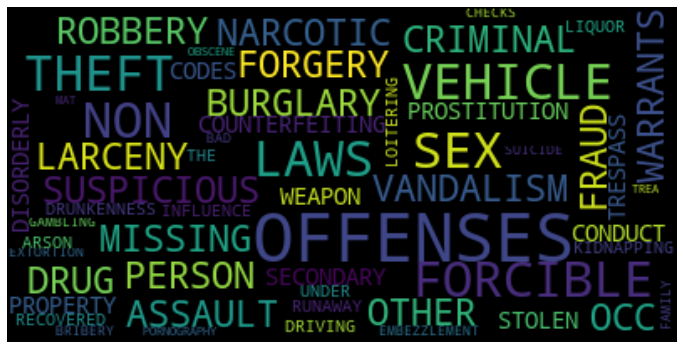

In [35]:
text = ''
with open('category.txt', encoding = 'utf-8') as f:
    text = ''.join(f.readlines())
    
    
wc = WordCloud()
wc.generate(text)
wc.to_file('output.png')
wc = WordCloud(max_font_size=40).generate(text)
fig = plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [36]:
data_train.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Resolution', 'Address', 'X', 'Y',
       'Date', 'IsDay', 'Hour', 'Month', 'Year', 'HourCos', 'DayOfWeekCos',
       'MonthCos', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL',
       'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN',
       'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN',
       'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'CategoryInt',
       'InIntersection'],
      dtype='object')

In [37]:
feature_sel = ['IsDay', 'Hour', 'Month', 'Year',
               'DayOfWeek', 'InIntersection',
               'X', 'Y', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL',
               'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN',
               'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN',
               'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN']
target_sel = 'CategoryInt'

train_x = data_train[feature_sel]
train_y = data_train[target_sel]

test_ids = data_test['Id']
test_x = data_test[feature_sel]

## Step 4: Modelling and Evaluation
Using Xgboost, we develop an algorithm to predict the category of crimes that occured in in the city by the bay.

**Machine Learning Classification Algorithms:**
* [Ensemble Methods](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [Generalized Linear Models (GLM)](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [Naive Bayes](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)
* [Nearest Neighbors](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)
* [Support Vector Machines (SVM)](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)
* [Decision Trees](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)
* [Discriminant Analysis](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.discriminant_analysis)

In [38]:
type(train_x), type(train_y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [40]:
# Creating the DMatrices 
train_xgb = xgb.DMatrix(train_x, label=train_y)
test_xgb = xgb.DMatrix(test_x)

In [42]:
# Creating the parameters and doing Cross Validation
params = {
    'max_depth': 4,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 39,
}

In [44]:
CROSS_VAL = False
if CROSS_VAL:
    print('Performing Cross-validation ...')
    cv_i = xgb.cv(params, train_xgb, nfold=3, early_stopping_rounds=10, metrics='mlogloss', verbose_eval=True)  
    print(cv_i)

In [49]:
SUBMIT = not CROSS_VAL
if SUBMIT:
    print('Fitting Model ...')
    m = xgb.train(params, train_xgb, 10)
    res = m.predict(test_xgb)
    cols = ['Id'] + Cat_Le.classes_
    submission = pd.DataFrame(res, columns=Cat_Le.classes_)
    submission.insert(0, 'Id', test_ids)
    submission.to_csv(r"C:\Users\seyi\Desktop\MY DATA SCIENCE WORKS, TUTORIAL AND JOURNEY\MY DATASETS USED\sf-crime\sf-crime\sampleSubmission.csv", index=False)
    print('Done Outputing !')
    print(submission.sample(3))
else:
    print('NOT SUBMITING')


Fitting Model ...
Done Outputing !
            Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  \
547753  547753  0.005812  0.054117    0.005500  0.005554  0.006008   
789436  789436  0.005582  0.049994    0.005625  0.004946  0.109377   
67719    67719  0.005620  0.057279    0.004485  0.004535  0.092458   

        DISORDERLY CONDUCT  DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  \
547753            0.007253                     0.006064       0.067101   
789436            0.006848                     0.005040       0.027613   
67719             0.005872                     0.006565       0.013820   

        DRUNKENNESS  ...  SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY  \
547753     0.008626  ...                   0.005521         0.008697   
789436     0.006294  ...                   0.004875         0.007993   
67719      0.009056  ...                   0.004469         0.009936   

         SUICIDE  SUSPICIOUS OCC      TREA  TRESPASS  VANDALISM  \
547753  0.005487        0.01905

In [53]:
# Correlation Heatmap
submission.corr()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,1.000000,-0.002676,0.001668,0.161214,-0.003873,0.025816,0.014049,-0.042802,0.103892,-0.028193,...,0.010042,-0.436098,0.006412,-0.190184,0.008773,-0.020940,-0.009739,0.455832,0.102827,-0.003107
ARSON,-0.002676,1.000000,0.451357,0.284417,0.349451,0.204532,0.096914,0.144273,-0.122761,0.192743,...,0.331255,0.110672,0.107998,0.331962,0.304774,0.163086,0.413468,0.030855,-0.022585,0.360006
ASSAULT,0.001668,0.451357,1.000000,0.360015,0.403392,0.340373,0.084790,-0.003723,-0.020480,0.325243,...,0.329906,0.113107,0.145878,0.536688,0.307102,0.320324,0.451696,-0.029340,0.028744,0.550788
BAD CHECKS,0.161214,0.284417,0.360015,1.000000,0.772631,0.341392,0.136799,-0.003691,-0.105604,0.176743,...,0.819397,0.333313,0.273353,0.579474,0.835907,0.271568,0.228241,0.028193,0.074278,0.239092
BRIBERY,-0.003873,0.349451,0.403392,0.772631,1.000000,0.174036,0.109071,0.087115,-0.129897,0.204048,...,0.898467,0.370502,0.276371,0.467611,0.911964,0.149590,0.322137,0.095452,0.053952,0.457291
BURGLARY,0.025816,0.204532,0.340373,0.341392,0.174036,1.000000,-0.019923,-0.264451,-0.304672,-0.084330,...,0.155166,0.099801,0.144282,0.660718,0.162493,0.462588,0.398439,-0.007593,-0.368011,-0.061255
DISORDERLY CONDUCT,0.014049,0.096914,0.084790,0.136799,0.109071,-0.019923,1.000000,0.048031,0.026774,0.125855,...,0.126918,0.053269,0.030204,0.036260,0.135348,0.527241,-0.070266,-0.089984,0.155416,0.003551
DRIVING UNDER THE INFLUENCE,-0.042802,0.144273,-0.003723,-0.003691,0.087115,-0.264451,0.048031,1.000000,-0.085941,0.405900,...,0.130772,0.049549,-0.006795,-0.171639,0.124991,-0.218032,0.168016,0.088787,-0.050395,0.019470
DRUG/NARCOTIC,0.103892,-0.122761,-0.020480,-0.105604,-0.129897,-0.304672,0.026774,-0.085941,1.000000,-0.056824,...,-0.122229,-0.098141,-0.062690,-0.213826,-0.105635,-0.024505,-0.432485,-0.272632,0.685803,0.055298
DRUNKENNESS,-0.028193,0.192743,0.325243,0.176743,0.204048,-0.084330,0.125855,0.405900,-0.056824,1.000000,...,0.252294,0.174081,0.050663,-0.050004,0.266970,-0.056536,0.331942,-0.031400,0.079248,0.037617


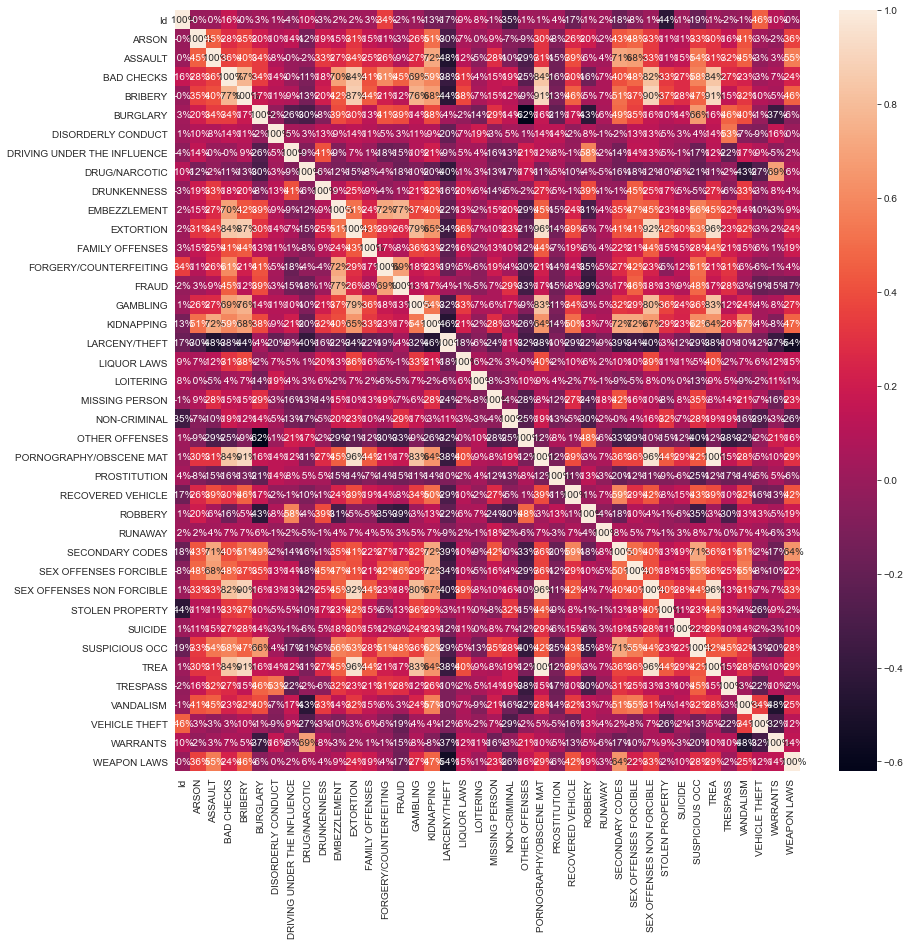

In [55]:
# Visuaizing using an HeatMap, the result
plt.figure(figsize=(14,14))
sns.heatmap(submission.corr(), annot=True, fmt= ' .0%')